岭回归
train score: 0.339, test score: 0.332

支持向量回归/SVR(kernel='rbf',C=10,gamma=0.001)
train score: 0.417, test score: 0.408

随机森林回归/Random Forest(n_estimators = 100)
train score: 0.867, test score: 0.838

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=0.7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

得分分别是:

0.584207  with:   {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 10}
0.602304  with:   {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 100}
0.601346  with:   {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 300}
0.602577  with:   {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 500}
0.618528  with:   {'m

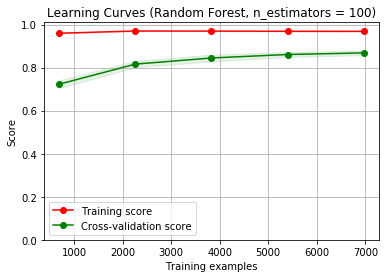

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

df_train = pd.read_csv('kaggle_bike_competition_train.csv',header = 0)

df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour
df_train_origin = df_train
df_train = df_train.drop(['datetime','casual','registered'],axis=1)

df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis=1).values


X_train,X_test,Y_train,Y_test = train_test_split(df_train_data,df_train_target,test_size=0.2,random_state=0)
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)

print('岭回归')
svc = linear_model.Ridge().fit(X_train,Y_train)
print('train score: {0:.3f}, test score: {1:.3f}\n'.format(svc.score(X_train,Y_train),svc.score(X_test,Y_test)))

print('支持向量回归/SVR(kernel=\'rbf\',C=10,gamma=0.001)')
svc = svm.SVR(kernel='rbf',C=10,gamma=0.001).fit(X_train,Y_train)
print('train score: {0:.3f}, test score: {1:.3f}\n'.format(svc.score(X_train,Y_train),svc.score(X_test,Y_test)))

print('随机森林回归/Random Forest(n_estimators = 100)')
svc = RandomForestRegressor(n_estimators=100,max_depth=9).fit(X_train,Y_train)
print('train score: {0:.3f}, test score: {1:.3f}\n'.format(svc.score(X_train,Y_train),svc.score(X_test,Y_test)))

#调参

parameters = {'n_estimators':[10,100,300,500],'max_depth':[5,10,15],'max_features':[0.5,0.7,0.9]}
svc = RandomForestRegressor()
clf = GridSearchCV(svc,parameters,cv=5,scoring='r2')
clf.fit(X_train,Y_train)

#best_estimator_ returns the best estimator chosen by the search
print(clf.best_estimator_)
print("")
print("得分分别是:")
print('')
means = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
X_train,X_test,Y_train,Y_test = train_test_split(df_train_data,df_train_target,test_size=0.2,random_state=0) 
estimator = RandomForestRegressor(n_estimators = clf.best_estimator_.n_estimators,max_depth=clf.best_estimator_.max_depth,max_features=clf.best_estimator_.max_features)
plot_learning_curve(estimator, title, X_train, Y_train, (0.0, 1.01), cv=5, n_jobs=4)

plt.show()
    